In [7]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
#from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

def find_affine(before, after):
  A = []
  b = []
  
  for i in range(0, len(before)):
    p_before = before[i]
    p_after = after[i]
    A.append([p_before[0], p_before[1], 1, 0, 0, 0])
    A.append([0, 0, 0, p_before[0], p_before[1], 1])
    b.append(p_after[0])
    b.append(p_after[1])
  return np.reshape(np.dot(np.linalg.inv(A),b), (2,3))




print(pts1)
print(pts2)



# implement this function
#M = cv2.getAffineTransform(pts1,pts2)
M = find_affine(pts1,pts2)
print(M)

dst = cv2.warpAffine(img,M,img.shape[:2])
#cv2_imshow(img)
#cv2_imshow(dst)




downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg
[[  0.   0.]
 [600.   0.]
 [  0. 600.]]
[[ 50.   0.]
 [600.  50.]
 [  0. 550.]]
[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


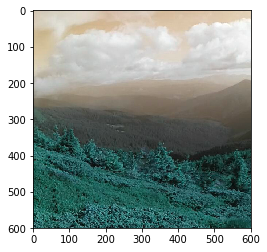

In [8]:
plt.imshow(img)

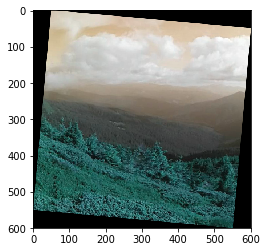

In [9]:
plt.imshow(dst)